In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

df = pd.read_csv("../data/Default.csv")

df.info(), df.describe(), df['default'].value_counts(), df['student'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


(None,
             balance        income
 count  10000.000000  10000.000000
 mean     835.374886  33516.981876
 std      483.714985  13336.639563
 min        0.000000    771.967729
 25%      481.731105  21340.462903
 50%      823.636973  34552.644802
 75%     1166.308386  43807.729272
 max     2654.322576  73554.233495,
 default
 No     9667
 Yes     333
 Name: count, dtype: int64,
 student
 No     7056
 Yes    2944
 Name: count, dtype: int64)

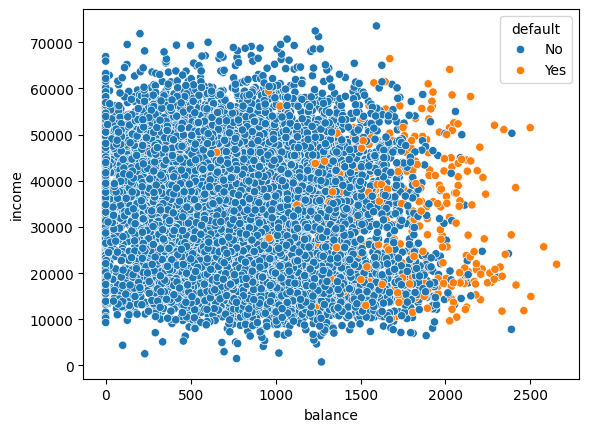

In [127]:
# Defualt dvs om du kan betala tillbaka dina lån dvs personlig konkurs
# Efterssom datan är så kompakt och så mycket överlappning så kommer inte 
# en linjär regression att fungera så bra
sns.scatterplot(data=df, x='balance', y='income', hue='default');

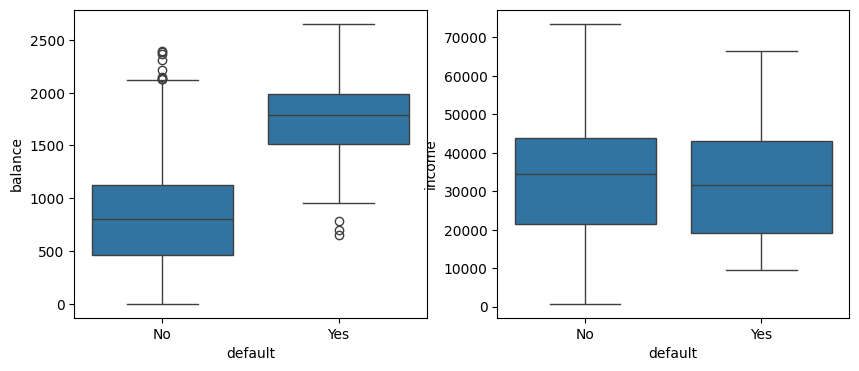

In [128]:
fig, ax =plt.subplots(1, 2, dpi=100, figsize=(10,4))

for axi, col in zip(ax, ["balance", "income"]):
    sns.boxplot(data=df, x="default", y=col, ax=axi)

# Boxplot jämför med någon sorts normalfördelning

In [129]:
# One Hot Encoding (Sätter till 0 om den inte tillhör någon kategori, eller båda kategorier)
#df = pd.get_dummies(df, columns=["default", "student"])
# Dummy Encoding )=
df = pd.get_dummies(df, columns=["default", "student"], drop_first=True)
df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,False,False
1,817.180407,12106.134700,False,True
2,1073.549164,31767.138947,False,False
3,529.250605,35704.493935,False,False
4,785.655883,38463.495879,False,False


Text(0.5, 1.0, 'Logistic Function')

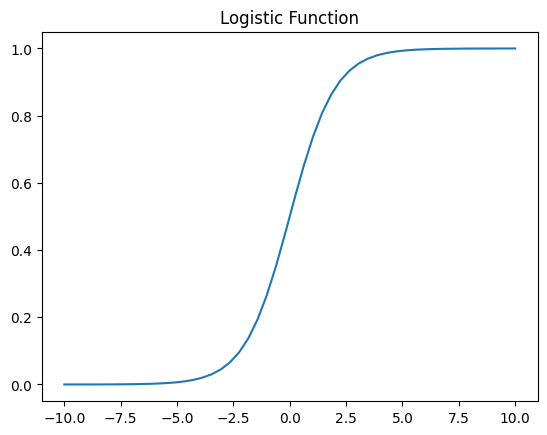

In [130]:
# Logistic Function 
# Nu modelerar vi sannolikheten
# Sigmoid kurvor är bra för sannolikhet för det begränsar till ett värde mellan 0 och 1
# e används för det är en bas
logisitc_function = lambda x: np.exp(x)/(1+np.exp(x))
x = np.linspace(-10, 10)
plt.plot(x, logisitc_function(x))
plt.title("Logistic Function")

In [131]:
# Om vi inte skalar om så kommer klasserna att bli vikatade om dom 
# är av olika storlek
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

X, y = df.drop("default_Yes", axis=1), df['default_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,  random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model = LogisticRegression(penalty=None)
model.fit(scaled_X_train, y_train)
model.coef_, model.intercept_
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

(array([[ 2.88848257,  0.00619039, -0.29011374]]), array([-6.36187634]))

In [132]:
test_sample = pd.DataFrame({"balance": [1500, 1500], "income":[40000, 40000], "student_yes":[0,1]})
scaled_test_sample = scaler.fit_transform(test_sample)
print(test_sample)
model.predict_proba(scaled_test_sample)

   balance  income  student_yes
0     1500   40000            0
1     1500   40000            1


array([[0.99769821, 0.00230179],
       [0.99871022, 0.00128978]])

In [133]:
y_pred = model.predict_proba(scaled_X_test)
y_pred[:5]

array([[9.30371604e-01, 6.96283964e-02],
       [9.98550654e-01, 1.44934591e-03],
       [9.99985392e-01, 1.46075512e-05],
       [9.99971155e-01, 2.88449734e-05],
       [9.54564556e-01, 4.54354445e-02]])

Accuracy: 0.973


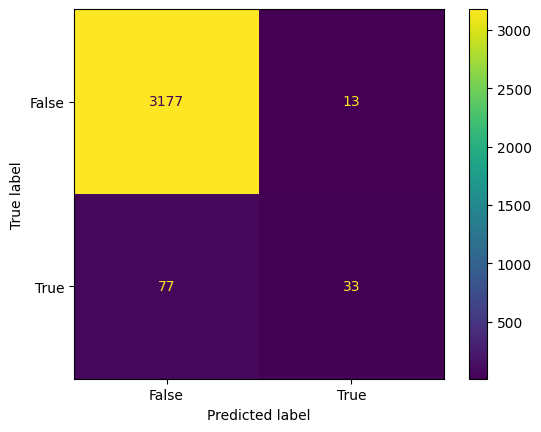

In [134]:
# Confusion Matrix 
# Diagonnalen är de korrekta värden

# Accuracy = Totak 
# Precsion = Hög när vi undviker False Postive 
# Recall = Häg när vi försöker undvika False Negative 
# (kanske blandae ihop dom)
# F1 = harmonic mean på allt 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score 

y_pred = model.predict(scaled_X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")
com = confusion_matrix(y_test, y_pred, labels=model.classes_)
displ = ConfusionMatrixDisplay(com, display_labels=model.classes_)
displ.plot()



In [135]:
# Ju mer obalanserat ditt data sett är ju mindre pålitligt blir confusion matrix
# Du kan försöka att balansera datasettet genom att ta bort eller lägga till 
# fler fall, men om verkligheten är obalanserat så kommer du förvrida datan

# I det här fallet, med den här datan som är väldigt obalanserat så hade han 
# försökt få tag på en annan typ av data ex vilka månader av året folk går 
# in i 'default'

accuracy = (3178+33)/(3178+12+77+33)
recall = 33/(33+77)
precisison = 33/(33+12)
f1 = 2*recall*precisison/(recall+precisison)
accuracy, recall, precisison, f1

(0.973030303030303, 0.3, 0.7333333333333333, 0.4258064516129032)

In [136]:
# Om du har ett obalanserat dataset så är det oftast bättre att 
# anända KNN istället för Logistical Regression 
# KNN är en icke paramatrisk metod, den har bara en hyperparametern K 
# Fungerar på både labled och unlabled data


# Försöka säga villket typ av vin det är baserart på den kemiska sammansättningen
from sklearn.datasets import load_wine 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

wine = load_wine()
wine.feature_names, wine.target_names
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df = pd.concat([df, pd.DataFrame(wine.target, columns = ["wine_class"])], axis=1)
df.head()



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [137]:
df["wine_class"].count()

178

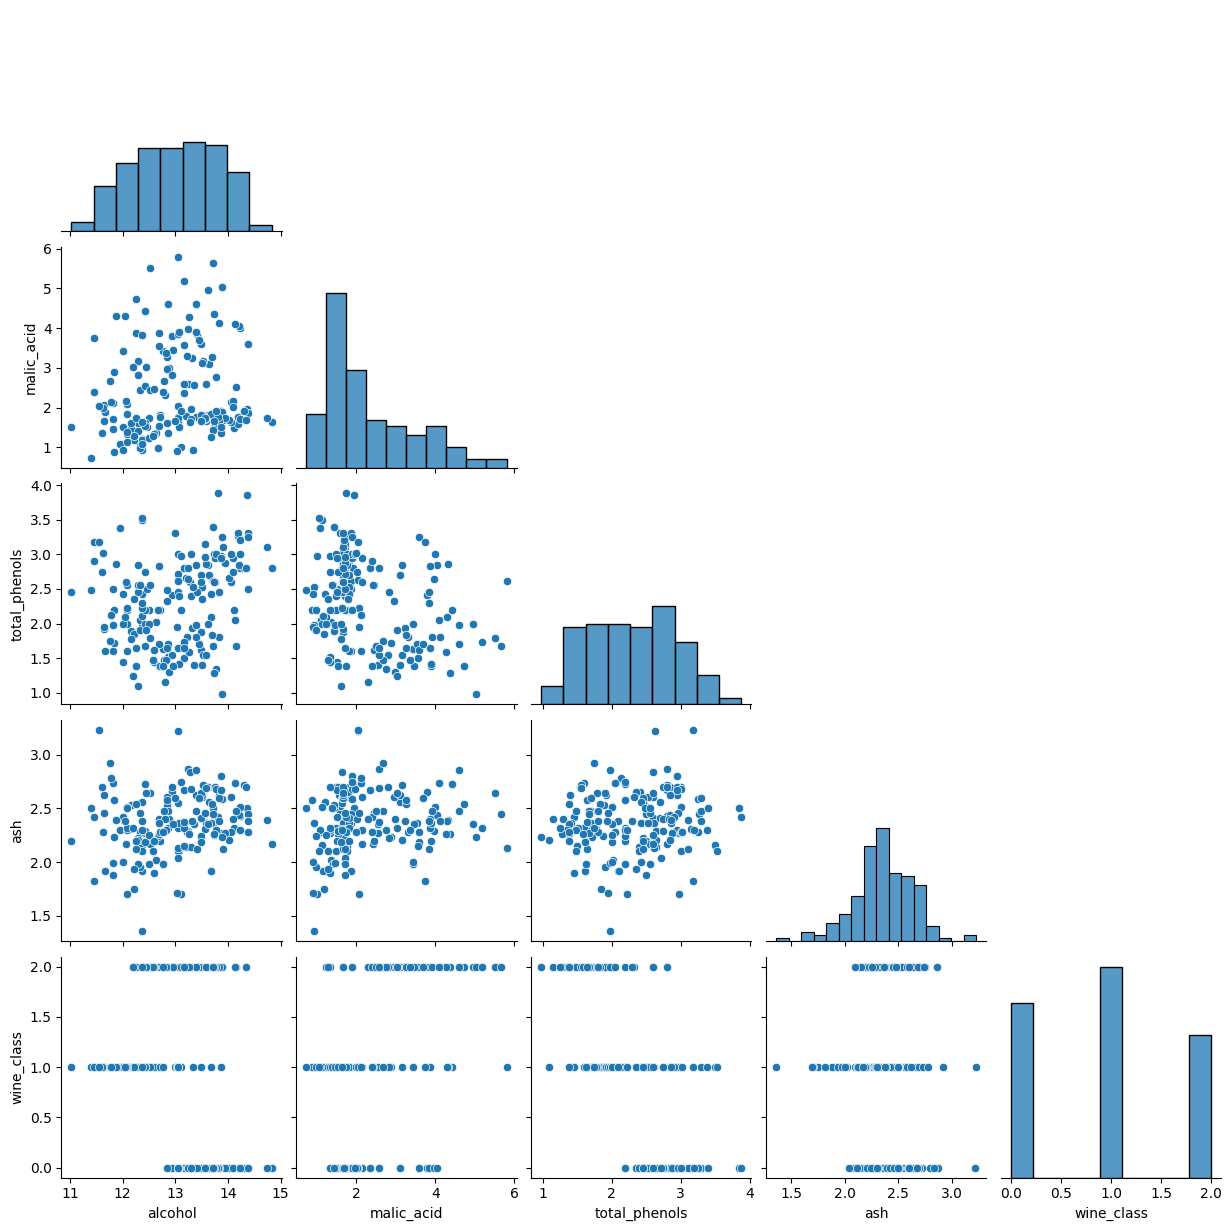

In [ ]:
df.columns
sns.pairplot(data=df[["alcohol","malic_acid", "total_phenols", "ash", "wine_class"]], corner=True);

<Axes: >

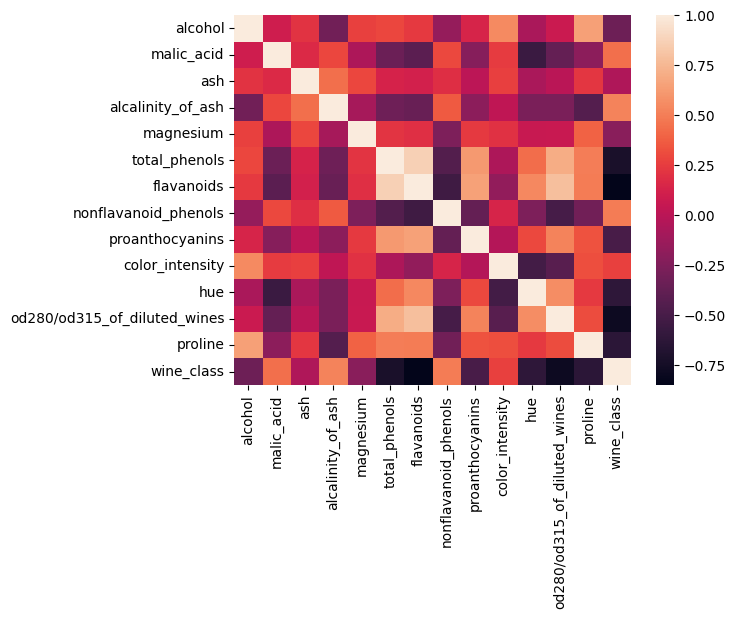

In [139]:
# Ju mer kolliniaretet vår data har ju mer problem får vi
# det kann hjälpa att ta bort några features, men det är inte säkert
sns.heatmap(df.corr(), )

In [140]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
X, y = df.drop("wine_class", axis="columns"), df["wine_class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model_KNN = KNeighborsClassifier(n_jobs=1)

model_KNN.fit(scaled_X_train, y_train)

y_pred = model_KNN.predict(scaled_X_test)



In [144]:
print( classification_report(y_test, y_pred))

# Varje rad dvs obervation blir en vektor och sen mäter vi avståndendet från en vektor till en annan

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.85      0.92        34
           2       0.92      1.00      0.96        22

    accuracy                           0.94        89
   macro avg       0.94      0.95      0.94        89
weighted avg       0.95      0.94      0.94        89



In [142]:
# Vi fick rätt bra resultat med KNN men vi kan göra en hyperparameteroptimering 
# för att försöka få bättre resultata 

## Pipeline and GridsearchCV
# Softmax tar dom individulle sanninager och scalerar om dom så att den 
# total summan blir 1

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()

pipe_log = Pipeline([("scaler", scaler), ("log", LogisticRegression(
    solver="saga", # finns massa olika solver men de är hyfsat avancerat att sätta sig in i 
    multi_class='ovr', # one v one, är som en turnering. Men vi använder den mer vanliga ovr 
    max_iter = 1000,
    penalty="elasticnet"))]) ## elsaticnet == l1 + l2

pipe_KNN = Pipeline([("scaler", scaler), ("knn", KNeighborsClassifier())])
param_grid_KNN = {"knn_n_neighbors": list(range(1,50))}

l1_ration = np.linspace(0, 1, 20)
param_grid_log = {"log__l1_ration": l1_ration}
# Scoring sätter vi till vad som är viktigast, vad vi är mest intresserade av 
# CV är hur många grupper vi vill dela in datan i, sen skiftart vi vilken som 
# är träning och vilken som är test

## CV aka cross validation, används bårder för att hitta hyperparametrar 
## men också bra för att testa
## nackdelen är att den är dyr
classifier_KNN = GridSearchCV(estimator=pipe_KNN, param_grid=param_grid_KNN, cv=5, scoring="accuracy")

classifier_log = GridSearchCV(estimator=pipe_log, param_grid=param_grid_log, cv=5, scoring="accuracy")

classifier_KNN.fit(X_train, y_train)
classifier_log.fit(X_train, y_train)

## Dena metod är dyr men väldigt genomgående
## Deepseek tränats på 300 grafikort i 52 veckor 
## chatGPT  tränats tusentals grafikort 3 år
## 83% av alla träningar som inte funkar 
## Så det är träningstiden som är dyrt, oftast gör man på en mindre mängd data, hittar de parar
## meterar man inte vill ha med och sen kör man på hela datasettet

ValueError: Invalid parameter 'knn_n_neighbors' for estimator Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]). Valid parameters are: ['memory', 'steps', 'transform_input', 'verbose'].

In [ ]:
classifier_KNN.best_estimator_.get_params()
classifier_log.best_estimator_.get_params()


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [143]:
y_pred = classifier_KNN.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
y_pred = classifier_log.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
# Så även om settet såg rörigt ut så visade det sig att dom va linjerbar 
# i högre dimensioner, 